In [101]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics.pairwise import pairwise_distances
import pylab
from sklearn.manifold import TSNE

In [102]:
perp = 4
max_iter = 1000
learning_rate = 100

def momentum(t):
    return 0.5 if t < 250 else 0.8 

sigma = 1/np.sqrt(2)

In [103]:
x = np.loadtxt("dataset1.txt", delimiter=",")

In [104]:
x = np.concatenate([np.arange(start=0, stop=99).reshape(-1, 3),
        np.arange(start=0, stop=99).
        reshape(-1, 3) + np.array(
    [-300, -300, -100])], axis=0)

In [105]:
# calculates the pairwise distance with cdist and applies transformations
pair_dist = np.exp(-pairwise_distances(x)**2/(2*sigma**2))

# see formula 1
pairwise_affinities = pair_dist / (np.sum(pair_dist, axis=1) - 1)
np.fill_diagonal(pairwise_affinities, 0)

In [115]:
p = 4 * (np.transpose(pairwise_affinities) + pairwise_affinities) / (2 * len(x))

# For being able to calculate cost function
p = np.maximum(p, 1e-12)

Iteration 1: error is 3.850813


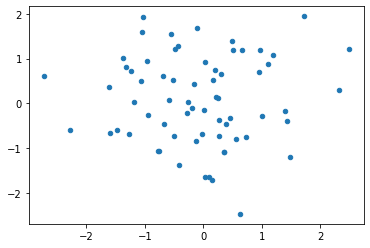

Iteration 101: error is 1.348570


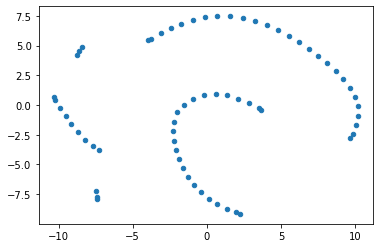

Iteration 201: error is 1.303082


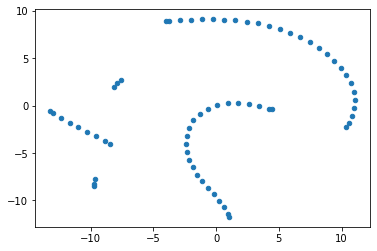

Iteration 301: error is 1.249648


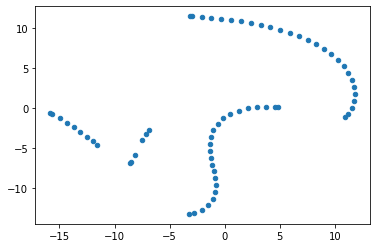

Iteration 401: error is 1.201723


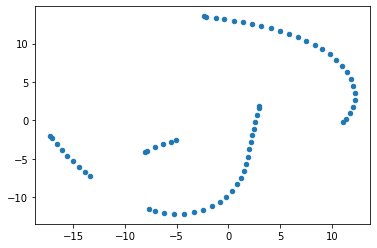

Iteration 501: error is 1.158093


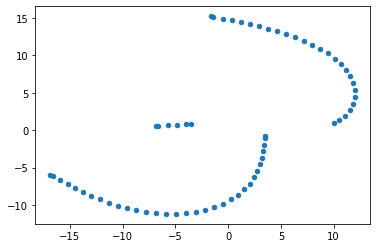

Iteration 601: error is 1.135295


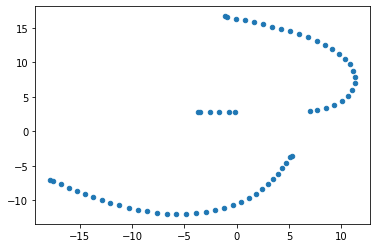

Iteration 701: error is 1.100641


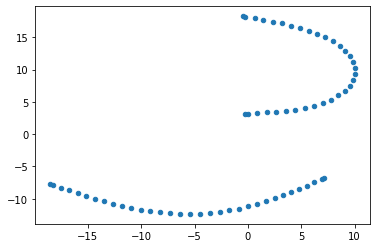

Iteration 801: error is 1.095255


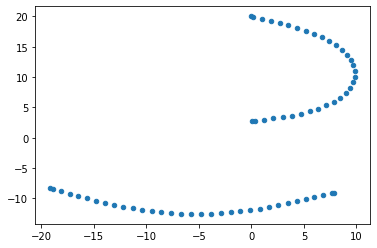

Iteration 901: error is 1.091874


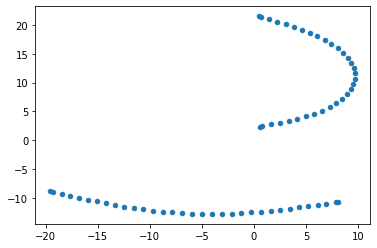

In [118]:
dims = 2
n, d = x.shape
y = np.random.randn(n, dims)
dY = np.zeros((n, dims))
change = np.zeros((n, dims))

for t in range(max_iter):
    # calculates the pairwise distance with cdist and applies transformations
    pair_dist = 1 / (1+pairwise_distances(y)**2)

    # see formula 4 
    q = pair_dist / (np.sum(pair_dist))

    pq = p - q
    for i in range(n):
        dY[i, :] = np.sum(np.tile(pq[:, i] * pair_dist[:, i], (dims, 1)).T * (y[i, :] - y), 0)

    y_new = y - learning_rate * dY + momentum(t) * change
    change = y_new - y
    y = y_new

    if t%100==0:
        C = np.sum(p * np.log(p / q))
        print("Iteration %d: error is %f" % (t + 1, C))
        pylab.scatter(y[:, 0], y[:, 1], 20)
        pylab.show()
    
    # Stop lying about P-values
    if iter == 100:
        p = p / 4.
